# 12 units ESN reservoir applied to wind-produced energy data

In [2]:
# Libraries importation

import matplotlib.pyplot as plt # for plotting
import numpy as np # for numerical operations
import pandas as pd # for data manipulation
import reservoirpy as rpy # for reservoir computing
from reservoirpy.nodes import Reservoir, Ridge # for reservoir computing
from reservoirpy.observables import rmse, rsquare # for reservoir computing
from tqdm import tqdm # for progress bar

# set reservoirpy verbosity to 0
rpy.verbosity(0)

0

In [3]:
# load data
df = pd.read_csv("wind_data_fr_2021.csv", sep=";")
# drop date column
df = df.iloc[:, 1:]
# convert to numpy array
da = df.to_numpy()
# scale down data
data_scaled_down = da / max(da)

Text(0.5, 1.0, 'Instant wind-produced power over a year')

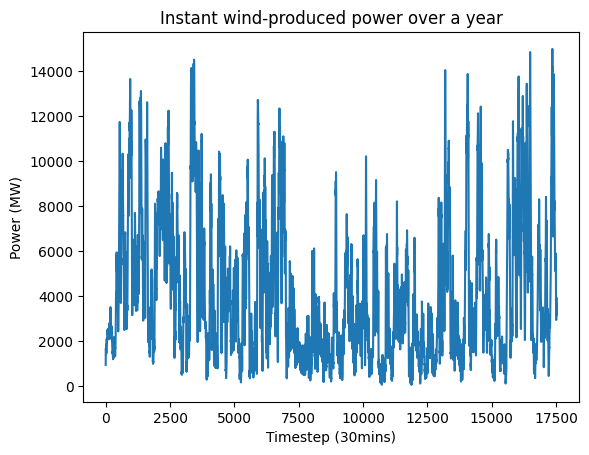

In [4]:
# plot data
plt.plot(da)
# legend axis x
plt.xlabel("Timestep (30mins)")
# legend axis y
plt.ylabel("Power (MW)")
# title
plt.title("Instant wind-produced power over a year")

Text(0.5, 1.0, 'Instant wind-produced power over a day')

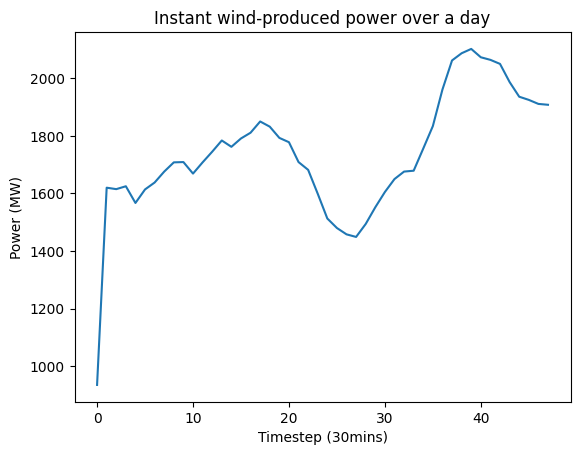

In [5]:
# partial plot
plt.plot(da[:48])
# legend axis x
plt.xlabel("Timestep (30mins)")
# legend axis y
plt.ylabel("Power (MW)")
# title
plt.title("Instant wind-produced power over a day")

# LR parameter optimization

In [6]:
# lr values to test
lr_array = np.linspace(0, 1, 11)
# outputs array
predictions_array = []

# loop over lr values
for i in tqdm(lr_array):
    reservoir = Reservoir(units=12, lr=i) # create a 12 units reservoir
    readout = Ridge(output_dim=1, ridge=1e-5) # create a ridge readout
    esn = reservoir >> readout # create the ESN
    esn.fit(data_scaled_down[:8760], data_scaled_down[1:8761], warmup=876) # fit the ESN with 50% of the data and warmup of 5%
    predictions = esn.run(data_scaled_down[8761:-1]) # run the ESN
    predictions = esn.fit(data_scaled_down[:8760], data_scaled_down[1:8761]).run(data_scaled_down[8761:-1]) # fit and run the ESN with the remaining 50% of the data
    predictions_array.append(predictions) # append predictions to predictions array

100%|██████████| 11/11 [00:31<00:00,  2.89s/it]


In [7]:
initial_rmse = 1 # initial rmse value
initial_rsquare = 0 # initial rsquare value
rmse_index = 0 # index of the best rmse
rsquare_index = 0 # index of the best rsquare

# loop over lr values
for i in range(len(lr_array)):
    # if rmse is better than the initial one
    if rmse(data_scaled_down[8762:], predictions_array[i]) < initial_rmse:
        initial_rmse = rmse(data_scaled_down[8762:], predictions_array[i]) # update initial rmse
        rmse_index = i # update index of the best rmse
    # if rsquare is better than the initial one
    if rsquare(data_scaled_down[8762:], predictions_array[i]) > initial_rsquare:
        initial_rsquare = rsquare(data_scaled_down[8762:], predictions_array[i]) # update initial rsquare
        rsquare_index = i # update index of the best rsquare
    
# print best rmse
print("Best RMSE: ", initial_rmse, "for lr = ", lr_array[rmse_index]) 
# print best rsquare
print("Best R^2: ", initial_rsquare, "for lr = ", lr_array[rsquare_index])

# if the best lr for rmse is the same as the best lr for rsquare
if (rmse_index == rsquare_index):
    best_lr = lr_array[rmse_index] # create best lr variable

Best RMSE:  0.011178994731290361 for lr =  0.6000000000000001
Best R^2:  0.9968682294267648 for lr =  0.6000000000000001


# SR parameter optimization

In [8]:
# sr values to test
sr_array = np.linspace(0, 1, 11)
# outputs array
predictions_array = []

# loop over sr values
for i in tqdm(sr_array):
    reservoir = Reservoir(units=12, sr=i) # create a 12 units reservoir
    readout = Ridge(output_dim=1, ridge=1e-5) # create a ridge readout
    esn = reservoir >> readout # create the ESN
    esn.fit(data_scaled_down[:8760], data_scaled_down[1:8761], warmup=876) # fit the ESN with 50% of the data and warmup of 5%
    predictions = esn.run(data_scaled_down[8761:-1]) # run the ESN
    predictions = esn.fit(data_scaled_down[:8760], data_scaled_down[1:8761]).run(data_scaled_down[8761:-1]) # fit and run the ESN with the remaining 50% of the data
    predictions_array.append(predictions) # append predictions to predictions array

100%|██████████| 11/11 [00:31<00:00,  2.88s/it]


In [9]:
initial_rmse = 1 # initial rmse value
initial_rsquare = 0 # initial rsquare value
rmse_index = 0 # index of the best rmse
rsquare_index = 0 # index of the best rsquare

# loop over sr values
for i in range(len(sr_array)):
    # if rmse is better than the initial one
    if rmse(data_scaled_down[8762:], predictions_array[i]) < initial_rmse:
        initial_rmse = rmse(data_scaled_down[8762:], predictions_array[i]) # update initial rmse
        rmse_index = i # update index of the best rmse
    # if rsquare is better than the initial one
    if rsquare(data_scaled_down[8762:], predictions_array[i]) > initial_rsquare:
        initial_rsquare = rsquare(data_scaled_down[8762:], predictions_array[i]) # update initial rsquare
        rsquare_index = i # update index of the best rsquare

# print best rmse
print("Best RMSE: ", initial_rmse, "for sr = ", sr_array[rmse_index])
# print best rsquare
print("Best R^2: ", initial_rsquare, "for sr = ", sr_array[rsquare_index])

# if the best sr for rmse is the same as the best sr for rsquare
if (rmse_index == rsquare_index):
    best_sr = sr_array[rmse_index] # create best sr variable

Best RMSE:  0.00878035615810198 for sr =  0.6000000000000001
Best R^2:  0.9980679929747233 for sr =  0.6000000000000001


# Classical reservoir with optimized parameters applied to the data

In [10]:
reservoir = Reservoir(units=12, lr = best_lr, sr = best_sr) # create a 12 units reservoir with best lr and best sr
readout = Ridge(output_dim=1, ridge=1e-5) # create a ridge readout
esn = reservoir >> readout # create the ESN
esn.fit(data_scaled_down[:8760], data_scaled_down[1:8761], warmup=876) # fit the ESN with 50% of the data and warmup of 5%
predictions = esn.run(data_scaled_down[8761:-1]) # run the ESN
predictions = esn.fit(data_scaled_down[:8760], data_scaled_down[1:8761]).run(data_scaled_down[8761:-1]) # fit and run the ESN with the remaining 50% of the data

In [11]:
# print rmse and rsquare
print("RMSE = ", rmse(data_scaled_down[8762:], predictions), "R^2 = ", rsquare(data_scaled_down[8762:], predictions))

RMSE =  0.0150528716898293 R^2 =  0.9943216369549908


In [12]:
# scale up predictions
predictions_scaled_up = predictions * max(da)

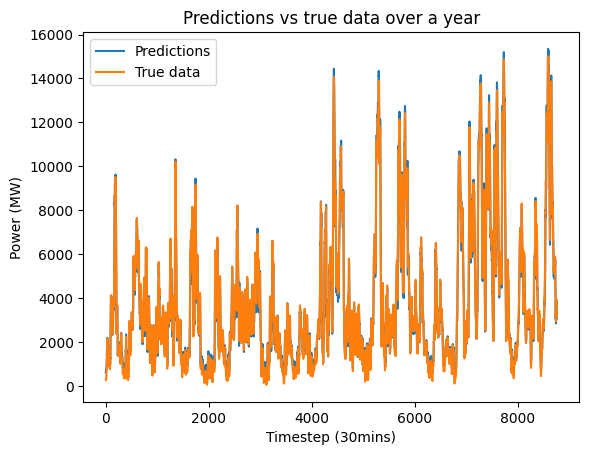

In [13]:
# plot predictions
plt.plot(predictions_scaled_up)
# plot true data
plt.plot(da[8762:])
# legend axis x
plt.xlabel("Timestep (30mins)")
# legend axis y
plt.ylabel("Power (MW)")
# title
plt.title("Predictions vs true data over 6 months")
# legend
plt.legend(["Predictions", "True data"])

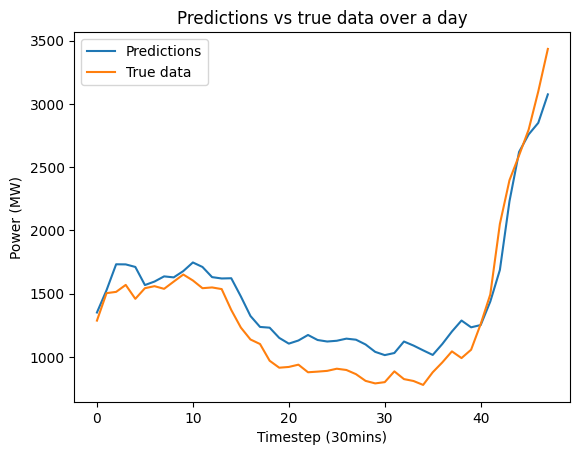

In [15]:
# partial plot predictions
plt.plot(predictions_scaled_up[48:96])
# partial plot true data
plt.plot(da[8810:8858])
# legend axis x
plt.xlabel("Timestep (30mins)")
# legend axis y
plt.ylabel("Power (MW)")
# title
plt.title("Predictions vs true data over a day")
# legend
plt.legend(["Predictions", "True data"])